### Dataset & Libraries 

In [13]:
import pandas as pd
import pickle
#import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np
import sklearn.model_selection as sms
from word_embedding import WordEmbedding
import gensim
from tqdm import tqdm
import unicodedata
import re 
from wordcloud import WordCloud
import nltk
from simpletransformers.classification import ClassificationModel, ClassificationArgs, MultiLabelClassificationModel, MultiLabelClassificationArgs
import pandas as pd
import io
#nltk.download('stopwords')

In [2]:
train_df = pd.read_json("train.json").set_index('Id')
test_df = pd.read_json("test.json").set_index('Id')
train_label = pd.read_csv("train_label.csv").set_index('Id')


In [3]:
test_df

description gender
Id                                                             
0       She currently works on CNN’s newest primetime...      F
1       Lavalette’s photographs have been shown widel...      M
2       Along with his academic and professional deve...      M
3       She obtained her Ph.D. in Islamic Studies at ...      F
4       She studies issues of women and Islam and has...      F
...                                                  ...    ...
54295   Prior to that, she worked as a Research Staff...      F
54296   The group’s antics began when they switched t...      M
54297   Formerly, she was the Coordinator for Music E...      F
54298   She started her law practice at Morris Mannin...      F
54299   Since 1995, he works as a programme maker and...      M

[54300 rows x 2 columns]

In [3]:
len(test_df)

54300

In [16]:
#TRAIN
#nombre de femmes
female=train_df[train_df["gender"]=="F"]
fem=female["gender"].count()
#nombre total de lignes
tot=train_df["gender"].count()
prop_women=fem/tot
#nombre d'hommes
male=train_df[train_df["gender"]=="M"]
ma=male["gender"].count()
prop_male=ma/tot

In [22]:
import plotly.graph_objects as go

labels = ['Female','Male']
values = [prop_women,prop_male]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial',title="Gender distribution in train set"
                            )])
fig.show()

In [24]:
#TEST
#nombre de femmes
female=test_df[test_df["gender"]=="F"]
fem=female["gender"].count()
#nombre total de lignes
tot=test_df["gender"].count()
prop_women=fem/tot
#nombre d'hommes
male=test_df[test_df["gender"]=="M"]
ma=male["gender"].count()
prop_male=ma/tot

In [25]:
import plotly.graph_objects as go

labels = ['Female','Male']
values = [prop_women,prop_male]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial',title="Gender distribution in test set"
                            )])
fig.show()

Text(0.5, 1.0, 'Gender distribution in train set')

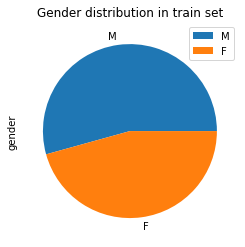

In [19]:
train_gender=pd.DataFrame(train_df['gender'].value_counts())
train_gender.plot.pie(y="gender")
plt.title("Gender distribution in train set")

In [ ]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
df = px.data.tips()
fig = px.pie(df, values='tip', names='day')
fig.show()

Text(0.5, 1.0, 'Gender distribution in test set')

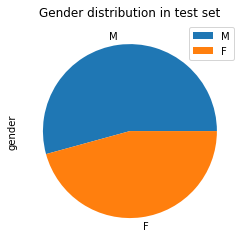

In [6]:
test_gender=pd.DataFrame(test_df['gender'].value_counts())
test_gender.plot.pie(y="gender")
plt.title("Gender distribution in test set")

In [7]:
train_label

Category
Id              
0             19
1              9
2             19
3             24
4             24
...          ...
217192        19
217193        22
217194        19
217195        19
217196         1

[217197 rows x 1 columns]

In [8]:
test_df

description gender
Id                                                             
0       She currently works on CNN’s newest primetime...      F
1       Lavalette’s photographs have been shown widel...      M
2       Along with his academic and professional deve...      M
3       She obtained her Ph.D. in Islamic Studies at ...      F
4       She studies issues of women and Islam and has...      F
...                                                  ...    ...
54295   Prior to that, she worked as a Research Staff...      F
54296   The group’s antics began when they switched t...      M
54297   Formerly, she was the Coordinator for Music E...      F
54298   She started her law practice at Morris Mannin...      F
54299   Since 1995, he works as a programme maker and...      M

[54300 rows x 2 columns]

In [9]:
import plotly.graph_objects as go
data_count = train_label["Category"].value_counts()

fig = go.Figure(data=[go.Bar(x=data_count.index, y=data_count.values)])
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(xaxis_tickangle=-45,title='Distribution of jobs within categories',xaxis=dict(
        title='Category',
        tickmode='linear'),yaxis=dict(title='Number of jobs'))

fig.show()

In [57]:
train_df['Category'] = train_label['Category'].tolist()

In [58]:
train_df

description gender  label  \
Id                                                                        
0        She is also a Ronald D. Asmus Policy Entrepre...      F     19   
1        He is a member of the AICPA and WICPA. Brent ...      M      9   
2        Dr. Aster has held teaching and research posi...      M     19   
3        He runs a boutique design studio attending cl...      M     24   
4        He focuses on cloud security, identity and ac...      M     24   
...                                                   ...    ...    ...   
217192   A member of the UWA Cultural Collections Boar...      M     19   
217193   Kelly has worked globally leading teams of co...      F     22   
217194   He's the lead author of a recent study that f...      M     19   
217195   She specializes in the theoretical and pedago...      F     19   
217196   Since she was 10 years old she has become a m...      F      1   

        Category  
Id                
0             19  
1              9  
2             19  
3             24  
4             24  
...          ...  
217192        19  
217193        22  
217194        19  
217195        19  
217196         1  

[217197 rows x 4 columns]

In [60]:
fema= train_df[train_df["gender"]=="F"]
fema_cat=fema["Category"].value_counts()
#train_label["Category"].value_counts()

In [54]:
fema

description gender  label
Id                                                                     
0        She is also a Ronald D. Asmus Policy Entrepre...      F     19
6        As an associate Web producer for WFIU, Liz ma...      F      6
8        Her teachings get straight to the heart of Ta...      F      3
9        For more quips and tips, refer to her blog, “...      F     14
10       An elder in the United Methodist Church, she ...      F     19
...                                                   ...    ...    ...
217186   She is a member of the KABA-GA Programming Co...      F     26
217187   She has a B.A from Monash University in Lingu...      F      3
217193   Kelly has worked globally leading teams of co...      F     22
217195   She specializes in the theoretical and pedago...      F     19
217196   Since she was 10 years old she has become a m...      F      1

[99244 rows x 3 columns]

In [48]:
fema_cat

19    70016
26    18820
20    14646
14    12622
6     12295
11    11607
22    10391
3      9145
8      6616
24     5841
16     5450
5      4621
15     4292
18     4124
1      4115
13     4060
25     3395
9      3121
27     2288
12     1639
0      1497
17     1406
23      967
2       944
7       858
10      831
4       807
21      783
Name: Category, dtype: int64

In [66]:
#répartition pour les femmes
import plotly.graph_objects as go
#data_count = train_label["Category"].value_counts()

fig = go.Figure(data=[go.Bar(x=fema_cat.index, y=fema_cat.values)])
fig.update_traces(marker_color='rgb(100,350,20)', marker_line_color='rgb(12,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(xaxis_tickangle=-45,title='Distribution of women within job categories',xaxis=dict(
        title='Category',
        tickmode='linear'),yaxis=dict(title='Number of women'))

fig.show()

In [3]:
ma= train_df[train_df["gender"]=="M"]
ma_cat=ma["Category"].value_counts()

KeyError: 'Category'

In [72]:
#répartition pour les hommes
import plotly.graph_objects as go

fig = go.Figure(data=[go.Bar(x=ma_cat.index, y=ma_cat.values)])
fig.update_traces(marker_color='rgb(20,50,300)', marker_line_color='rgb(12,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(xaxis_tickangle=-45,title='Distribution of men within job categories',xaxis=dict(
        title='Category',
        tickmode='linear'),yaxis=dict(title='Number of men'))

fig.show()

In [9]:
train_label

Category
Id              
0             19
1              9
2             19
3             24
4             24
...          ...
217192        19
217193        22
217194        19
217195        19
217196         1

[217197 rows x 1 columns]

In [4]:
data_train=pd.concat([train_df,train_label],axis=1)

In [87]:
data_train

description gender  Category
Id                                                                        
0        She is also a Ronald D. Asmus Policy Entrepre...      F        19
1        He is a member of the AICPA and WICPA. Brent ...      M         9
2        Dr. Aster has held teaching and research posi...      M        19
3        He runs a boutique design studio attending cl...      M        24
4        He focuses on cloud security, identity and ac...      M        24
...                                                   ...    ...       ...
217192   A member of the UWA Cultural Collections Boar...      M        19
217193   Kelly has worked globally leading teams of co...      F        22
217194   He's the lead author of a recent study that f...      M        19
217195   She specializes in the theoretical and pedago...      F        19
217196   Since she was 10 years old she has become a m...      F         1

[217197 rows x 3 columns]

In [5]:
data_train.gender=pd.Categorical(data_train.gender)
data_train.Category=pd.Categorical(data_train.Category)

array([<AxesSubplot:title={'center':'F'}>,
       <AxesSubplot:title={'center':'M'}>], dtype=object)

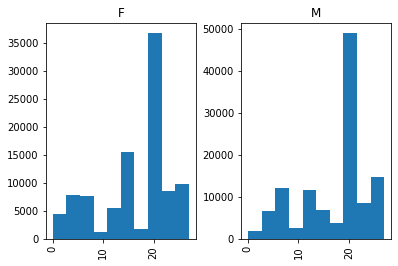

In [13]:
data_train.Category.hist(by=data_train.gender)

In [14]:
categories_df= pd.read_csv("categories_string.csv")

In [15]:
categories_df
#on a 27 métiers 

0   1
0              pastor   0
1               model   1
2        yoga_teacher   2
3             teacher   3
4    personal_trainer   4
5             painter   5
6          journalist   6
7   interior_designer   7
8             surgeon   8
9          accountant   9
10                 dj  10
11          physician  11
12           comedian  12
13  software_engineer  13
14              nurse  14
15               poet  15
16            dentist  16
17       chiropractor  17
18          filmmaker  18
19          professor  19
20       photographer  20
21             rapper  21
22       psychologist  22
23          paralegal  23
24          architect  24
25           composer  25
26           attorney  26
27          dietitian  27

In [16]:
print(len(test_df))

54300


In [17]:
#L'idée c'est d'entrainer sur > 210 000 train dataset, 
#et sur les 54 300 du test on remplit les submissions csv avec notre prédiction sur quel metier (1 à 27)

In [18]:
#test


### Cleaning 

#### Librairies 


In [6]:
import re 
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/ali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from tqdm import tqdm
import unicodedata

In [8]:
class CleanText:

    def __init__(self):

        english_stopwords = nltk.corpus.stopwords.words('english')
        #french_stopwords = nltk.corpus.stopwords.words('french')
        
        #new_stop_words = ['year', 'new', 'including', 'current', 'received', 'experience', 'worked']
        #english_stopwords.extend(new_stop_words)
        
        #self.stopwords=english_stopwords+['year']
        
        self.stopwords = [self.remove_accent(sw) for sw in english_stopwords]

        self.stemmer = nltk.stem.SnowballStemmer('english')

    @staticmethod
    def convert_text_to_lower_case(txt):
        return txt.lower()
    
    @staticmethod
    def remove_accent(txt):
        return unicodedata.normalize('NFD', txt).encode('ascii', 'ignore').decode("utf-8")

    @staticmethod
    def remove_non_letters(txt):
        return re.sub('[^a-z_]', ' ', txt)

    def remove_stopwords(self, txt):
        return [w for w in txt.split() if (w not in self.stopwords)]

    def get_stem(self, tokens):
        return [self.stemmer.stem(token) for token in tokens]
    
    def apply_cleaning (self,txt) :
        txt=self.convert_text_to_lower_case(txt)
        txt=self.remove_non_letters(txt) # 'coucu c es moi ca va'
        tokens=self.remove_stopwords(txt) # ["coucou","c","es","moi","ca","va"]
        tokens_stem=self.get_stem(tokens) # ["coucou","c","es","moi","ca","va"]
        return tokens_stem 
    
    def clean_df_column(self,df, column_name, clean_column_name):
        df[clean_column_name]=[" ".join(self.apply_cleaning(x)) for x in tqdm(df[column_name].values)]

In [11]:
#bonne version
class CleanText:

    def __init__(self):

        english_stopwords = nltk.corpus.stopwords.words('english')
        
        new_stop_words = ['year', 'new', 'includ', 'current', 'receiv', 'experience', 'work']
        english_stopwords.extend(new_stop_words)
        
        self.stopwords=english_stopwords
        

        self.stemmer = nltk.stem.SnowballStemmer('english')

    @staticmethod
    def convert_text_to_lower_case(txt):
        return txt.lower()
    
    @staticmethod
    def remove_accent(txt):
        return unicodedata.normalize('NFD', txt).encode('ascii', 'ignore').decode("utf-8")

    @staticmethod
    def remove_non_letters(txt):
        return re.sub('[^a-z_]', ' ', txt)

    def remove_stopwords(self, txt):
        return [w for w in txt if (w not in self.stopwords)]

    def get_stem(self, txt):
        return [self.stemmer.stem(token) for token in txt.split()]
    
    def apply_cleaning (self,txt) :
        txt=self.convert_text_to_lower_case(txt)
        txt=self.remove_non_letters(txt) # 'coucou  c est moi tu vas bien'
        tokens_stem=self.get_stem(txt) 
        #tokens=" ".join(tokens_stem)
        tokens=self.remove_stopwords(tokens_stem)
        return tokens  

    def clean_df_column(self,df, column_name, clean_column_name):
        df[clean_column_name]=[" ".join(self.apply_cleaning(x)) for x in tqdm(df[column_name].values)]

In [12]:
ct=CleanText()

In [13]:
ct.stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
ct.clean_df_column(data_train, "description","description_cleaned")

100%|██████████| 217197/217197 [04:48<00:00, 752.88it/s]


In [26]:
data_train["description_cleaned"]

Id
0         also ronald asmus polici entrepreneur fellow g...
1         member aicpa wicpa brent graduat univers wisco...
2         dr aster held teach research posit ben gurion ...
3         run boutiqu design studio attend client unit s...
4         focus cloud secur ident access manag mobil sec...
                                ...                        
217192    member uwa cultur collect board gari chief cur...
217193    kelli global lead team consult kelli hold bach...
217194    lead author recent studi found hospit complic ...
217195    special theoret pedagog foundat bilingu educ f...
217196    sinc old becom model later start act career li...
Name: description_cleaned, Length: 217197, dtype: object

In [15]:
ct.clean_df_column(test_df, "description","description_cleaned")

100%|██████████| 54300/54300 [01:07<00:00, 800.77it/s] 


ici, nous avons pour chaque description de job non plus un paragraphe mais une liste de mots (tous en lowercase pour ne pas considérer par She and she as the same mot, et dont les mots 'bruits' st she are is etc. ont été supprimés)
Nous pouvons faire un Wordcloud pour voir les mots les plus fréquents et ainsi à la main ajouter des mots à la liste par défaut de stop-words si nous avons des mots 'bruits' particuliers à notre dataset

• Wordcloud

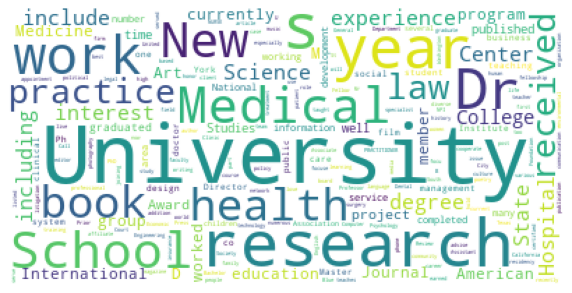

In [96]:
#before cleaning
from wordcloud import WordCloud
all_descr = " ".join(data_train.description.values)
wordcloud_word = WordCloud(background_color="white", collocations=False).generate_from_text(all_descr)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud_word,cmap=plt.cm.Paired)
plt.axis("off")
plt.show()

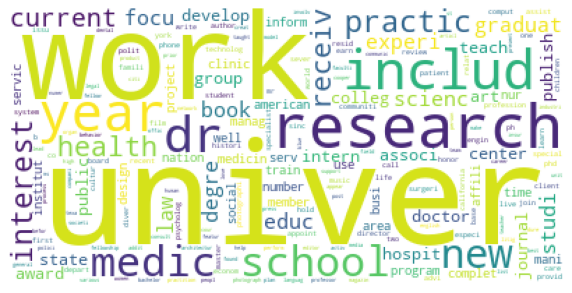

In [97]:
#after cleaning
all_descr_clean_stem = " ".join(data_train.description_cleaned.values)
wordcloud_word = WordCloud(background_color="white", collocations=False).generate_from_text(all_descr_clean_stem)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud_word,cmap=plt.cm.Paired)
plt.axis("off")
plt.show()

Le dataset a l'air plutôt propre  
• qlq propostitions : enlever 'new york/ united states/ well/ diverse/experience' qui n'ajoutent rien à la spécification d'un métier?  
year, new, including, current, received, experience, worked

In [30]:
new_stop_words = ['well', 'diverse', 'experience']
stop_words= stop_words.append(new_stop_words)
#piste à poursuivre ou pas .. (ou à faire après l'étape de stemming)

NameError: name 'stop_words' is not defined

• Stemming = remettre un mot à sa racine   
• PorterStemmer

In [30]:
from nltk.stem import PorterStemmer
# some words to be stemmed 
words = ["program", "experiences","fairly", "including", "be", "being", "was", "is","especially", "special","include", "universities"] 
ps = PorterStemmer()  
for w in words: 
    print(w, " : ", ps.stem(w)) 

program  :  program
experiences  :  experi
fairly  :  fairli
including  :  includ
be  :  be
being  :  be
was  :  wa
is  :  is
especially  :  especi
special  :  special
include  :  includ
universities  :  univers


Pour moi ce n'est pas la bonne solution  
be : was-> wa et is -> is (c'est quand même l'exemple le plus simple)  
university-> univers (pas du tout le même sens)

• LancasterStemmer   
"LancasterStemmer is simple, but heavy stemming due to iterations and over-stemming may occur. Over-stemming causes the stems to be not linguistic, or they may have no meaning"

In [31]:
from nltk.stem import LancasterStemmer
# some words to be stemmed 
words = ["program", "experiences","fairly", "including", "be", "being", "was", "is","especially", "special","include", "universities"] 
lc = LancasterStemmer()  
for w in words: 
    print(w, " : ", lc.stem(w)) 


program  :  program
experiences  :  expery
fairly  :  fair
including  :  includ
be  :  be
being  :  being
was  :  was
is  :  is
especially  :  espec
special  :  spec
include  :  includ
universities  :  univers


qlq différences entre les deux je ne sais pas lequel choisir ou si y a mieux (à creuser)

In [33]:
# fonction pour stem les mots du data à adapter en fonction du stemmer choisi

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
ps = PorterStemmer()
lc = LancasterStemmer()
stem_words = lambda new: [ps.stem(word) for word in new]
train_df['description']=train_df['description'].apply(stem_words)


In [34]:
train_df

Id                                        description gender
0           0  [also, ronald, d., asmu, polici, entrepreneur,...      F
1           1  [member, aicpa, wicpa., brent, graduat, univer...      M
10          8  [teach, get, straight, heart, tantric, buddhis...      F
100        80  [found, coupl, therapi, inc,, practic, intern,...      F
1000      780  [head, christian, doppler, laboratori, monitor...      M
10000    8015  [work, field, disast, manag, 20, years,, signi...      F
100000  80026  [columnist, russian, forbes,, freelanc, writer...      F
100003  80027  [patient, gave, averag, rate, 2.5, 5, stars., ...      M
100004  80028  [dr., grunewald', area, expertis, consist, lun...      M
100005  80029  [area, among, dr., ennis', clinic, interests:,...      M
100006  80030  [graduat, north, dakota, state, univers, bache...      M
100007  80031  [found, pet, photographi, business,, phodograp...      F
100008  80032  [andi, 12, year, experi, conducting,, performi...      M
100009  80033  [earn, bachelor, art, degre, hofstra, univers,...      F
100010  80034  [rajesh, shivhar, practic, shivhare', dental, ...      M
100011  80035  [part, role, east, london, scienc, school,, su...      F
100012  80036  [graduat, univers, otago,, new, zealand,, b.sc...      M
100013  80037  [receiv, bscn, st., franci, xavier, univers, r...      F
100014  80038  [music, motiv, work, share, other, photos., sh...      M
100015  80039  [area, expertis, consist, arrhythmia, (irregul...      M
100016  80040  [area, particular, interest, dr., schwabe, inc...      M
100017  80041  [practice,, dr., joseph, focus, neurolog, diso...      F
100018  80042  [involv, develop, nation, guidelin, area, resp...      M
100019  80043  [spent, sever, year, privat, practic, join, sh...      F
100020  80044  [move, husband, manhattan, cape, cod, 2008,, w...      F
100021  80045  [also, direct, undocu, migrat, project,, long-...      M
100022  80046  [research, center, around, sustain, educ, appa...      F
100025  80047  [first, becam, interest, histori, portraitur, ...      F
100027  80048  [patient, rate, dr., ferguson, averag, 3.0, st...      M
100028  80049  [amerigroup,, blue, cross/blu, shield,, empir,...      M
...       ...                                                ...    ...
99966   79998  [classic, train, special, orchestral,, choral,...      M
99967   79999  [attend, 3-year, long, seminar, assign, suppor...      M
99968   80000  [dr., hageman, studi, medicin, univers, cincin...      M
99969   80001  [receiv, ph.d., financ, hong, kong, univers, s...      M
99972   80002  [often, work, dancer, filmmak, still, photogra...      F
99973   80003  [implement, variou, unicast/multicast, mpls-si...      M
99974   80004  [involv, transact, span, array, sectors,, educ...      M
99976   80005  [present, numer, confer, includ, societi, musi...      M
99978   80006  [ms., georg, found, patric, georg, designs,, 1...      F
99979   80007  [serv, director, sever, mine, companies,, incl...      M
9998     8013  [also, hold, appoint, molecular, physiolog, bi...      M
99980   80008  [receiv, b.a., degre, psycholog, rollin, colle...      F
99981   80009  [research, focus, social, inequalities,, speci...      F
99982   80010  [sinc, train, michigan, state, university,, re...      F
99983   80011  [research,, examin, number, topic, relat, work...      F
99984   80012  [dr., waity’, research, focus, poverty,, food,...      F
99985   80013  [receiv, phd, univers, tennesse, 2012., recent...      M
99986   80014  [arrest, along, ten, journalist, trumped-up, t...      M
99987   80015  [creativ, critic, write, appear, dozen, magazi...      M
99988   80016  [blue, cross/blu, shield,, blue, choice,, blue...      M
99989   80017  [affili, dorn, vamc., take, blue, cross/blu, s...      F
9999     8014  [scrapbook, sinc, 2002,, mostli, european, tra...      F
99990   80018  [patient, gave, dr., celleri-pincu, averag, ra...      F
99992   80019  [research, examin, system, inequ, di

In [40]:
#snowball algorithm à checker #pip install pystremmer sur le terminal 

In [6]:
data_train = pd.read_csv("data_train.csv").set_index('Id')
test_df= pd.read_csv("test_df.csv").set_index('Id')

### Preparer le training dataset

• On doit rpz les données numériquement -> différentes méthodes de embedding  
• Word2vec

Word2Vec

In [16]:
import gensim

In [17]:
features_dimension = 300
min_count = 1
window = 5
hs = 0
negative = 10 # essayer 20

In [18]:
from word_embedding import WordEmbedding

In [19]:
array_token = [line.split(" ") for line in data_train["description_cleaned"].values]
#test_array_token = [line.split(" ") for line in test_df["description_cleaned"].values]

In [20]:
from word_embedding import WordEmbedding

we_sg = WordEmbedding(word_embedding_type = "word2vec", 
                      args = dict(sentences = array_token, sg=1, hs=hs, negative=negative, min_count=min_count, size=features_dimension, window = window, iter=10))
model_sg, training_time_sg = we_sg.train()
print("Model Skip-gram trained in %.2f minutes"%(training_time_sg/60))
model_sg.save("model_sg_100k")

we_cbow = WordEmbedding(word_embedding_type = "word2vec", 
                      args = dict(sentences = array_token, sg=0, hs=hs, negative=negative, min_count=min_count, size=features_dimension, window = window, iter=10))
model_cbow, training_time_cbow = we_cbow.train()
print("Model CBOW trained in %.2f minutes"%(training_time_cbow/60))
model_cbow.save("model_cbow_100k")



Model Skip-gram trained in 15.83 minutes
Model CBOW trained in 4.24 minutes


In [21]:
import sklearn.model_selection as sms

In [22]:
datatrain, datavalid = sms.train_test_split(data_train, test_size=0.1, random_state=42)
train_array_token = [line.split(" ") for line in datatrain["description_cleaned"].values]
valid_array_token = [line.split(" ") for line in datavalid["description_cleaned"].values]
#test_array_token = [line.split(" ") for line in test_df["description_cleaned"].values]

In [ ]:
# mettre dans un wordembedding.py

In [23]:
def get_features_mean(tokens, model):
    features = [model[x] for x in tokens if x in model]
    return np.mean(features, axis=0)

In [24]:
#Cbow

In [26]:
X_embedded_train_cbow, embedded_conversion_train_time_cbow = WordEmbedding.get_matrix_features_means(array_token, model_cbow)
X_embedded_valid_cbow, embedded_conversion_valid_time_cbow = WordEmbedding.get_matrix_features_means(valid_array_token, model_cbow)
#X_embedded_test_cbow, embedded_conversion_test_time_cbow = WordEmbedding.get_matrix_features_means(test_array_token, model_cbow)

In [ ]:
#skipgram

In [27]:
X_embedded_train_sg, embedded_conversion_train_time_sg = WordEmbedding.get_matrix_features_means(array_token, model_sg)
X_embedded_valid_sg, embedded_conversion_valid_time_sg = WordEmbedding.get_matrix_features_means(valid_array_token, model_sg)
#X_embedded_test_sg, embedded_conversion_test_time_sg = WordEmbedding.get_matrix_features_means(test_array_token, model_sg)

In [75]:
len(X_embedded_test_sg)

54300

In [ ]:
#model trained in the metadata

In [57]:
FORCE_TO_RUN = False

from ml_model import MlModel

we_models = [[model_sg, "skip-gram"],
            [model_cbow, "cbow"]]
             
             #,[model_pretrained, "pretrained"]

model_parameters = [["lr", {"C":[0.1, 1, 10]}],
                     ["rf", {"n_estimators" : [100,500]}],
                     ["mlp", {"hidden_layer_sizes" : [128, 256]}]
                      ]

if FORCE_TO_RUN:
    metadata = {}
    for we_model, we_name in we_models:
        train_token = train_array_token 
        X_train, embedded_conversion_train_time = WordEmbedding.get_matrix_features_means(train_token, we_model)
        Y_train = data_train.Categorie1.values
        valid_token = valid_array_token 
        X_valid, embedded_conversion_valid_time = WordEmbedding.get_matrix_features_means(valid_token, we_model)
        Y_valid = data_valid.Categorie1.values
        test_token = test_array_token 
        X_test, embedded_conversion_test_time = WordEmbedding.get_matrix_features_means(test_token, we_model)
        Y_test = data_test.Categorie1.values

        for ml_model_name, param_grid in model_parameters:
            ml_class = MlModel(ml_model_name=ml_model_name, param_grid=param_grid)
            best_model, best_metadata = ml_class.train_all_parameters(X_train, Y_train, X_valid, Y_valid, save_metadata=True)
            test_score = best_model.score(X_test, Y_test)
            accuracy_test = best_model.score(X_test, Y_test)
            f1_macro_score_test = smet.f1_score(best_model.predict(X_test),Y_test, average='macro')
            balanced_accuracy_test = smet.balanced_accuracy_score(best_model.predict(X_test),Y_test)
            best_metadata.update({"balanced_accuracy_test":balanced_accuracy_test,"accuracy_test": accuracy_test, "f1_macro_score_test":f1_macro_score_test, "embedded_conversion_train_time": embedded_conversion_train_time, "embedded_conversion_valid_time": embedded_conversion_valid_time, "embedded_conversion_test_time": embedded_conversion_test_time})
            metadata.update({(we_name, "",  ml_model_name): best_metadata})
    pickle.dump(metadata, open("metadata_2.pkl","wb"))

In [59]:
metadata = pickle.load(open("metadata_2.pkl","rb"))
metadata.update(pickle.load(open("metadata_2.pkl","rb")))

# Create figure
fig = go.Figure()

# Add traces
metrics = ["accuracy_train",'accuracy_valid', "accuracy_test", "learning_time", "predict_time","balanced_accuracy_test","balanced_accuracy_valid","balanced_accuracy_train", "f1_macro_score_test", "f1_macro_score_valid", "f1_macro_score_train"]
N_metrics = len(metrics)
method_ml_names = ['lr','rf','mlp']
N_method_ml_names = len(method_ml_names)

buttons = []
for i_metric, metric in enumerate(metrics):
    for method_ml_name in method_ml_names:
        fig.add_trace(
            go.Scatter(
                x=[k[0]+"_"+str(k[1]) for k,v in metadata.items() if v['name']==method_ml_name],
                y=[0 if ( not(k[0] in ("skip-gram","cbow")) and metric.startswith("embedded")) else v[metric] for k,v in metadata.items() if v['name']==method_ml_name],
                mode="markers",
                marker=dict(size=10),
                name = method_ml_name,
            )
        )
    buttons.append(
            dict(label=metric,
                 method="update",
                 args=[{"visible": [True if i in [i_metric*N_method_ml_names + k for k in range(N_method_ml_names)] else False for i in range(N_method_ml_names * N_metrics)]},
                       {"title": metric}]))
    

# Update remaining layout properties
fig.update_layout(
    title_text=metric,
    updatemenus=[
        dict(
            active=1,
            buttons=buttons
        )]
)

fig.show()

In [66]:
len(X_embedded_train_sg)

217197

In [69]:
len(data_train)

217197

In [29]:
X_train = X_embedded_train_sg
Y_train = data_train.Category.values
X_valid = X_embedded_valid_sg
Y_valid = datavalid.Category.values
#X_test =X_embedded_test_sg

X_train_cbow = X_embedded_train_cbow
Y_train_cbow = data_train.Category.values
X_valid_cbow = X_embedded_valid_cbow
Y_valid_cbow = datavalid.Category

# Logistic regression

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

#grid={"C":np.logspace(-3,3,7)}# l1 lasso l2 ridge
#grid = {"C":[0.1, 1,10]}
grid = {"C":[0.1, 1, 5,10]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
#logreg_cv=GridSearchCV(logreg,grid,cv=5)

In [36]:
Y_train = train_label.Category.values
logreg_cv.fit(X_train,Y_train)

KeyboardInterrupt: 

In [38]:
logreg_cv.fit(X_train_cbow,Y_train)

/Users/ali/opt/anaconda3/envs/TEST/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ali/opt/anaconda3/envs/TEST/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/ali/opt/anaconda3/envs/TEST/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ali/opt/anaconda3/envs/TEST/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/ali/opt/anaconda3/envs/TEST/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ali/opt/anaconda3/envs/TEST/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 5, 10]})

In [40]:
import pickle
with open('lr_gs_w2v_cbow_2.pkl', 'wb') as fid:
    pickle.dump(logreg_cv, fid) 

In [48]:
with open('lr_gs_w2v_2.pkl', 'rb') as fid:
    lr_gs_w2v_2=pickle.load(fid) 

In [50]:
predictions = lr_gs_w2v_2.predict(X_valid)
predictions[1:10]

array([19, 20, 19, 19, 26, 22,  3, 20, 20])

In [56]:
from sklearn import metrics
metrics.f1_score(Y_valid,predictions,average='samples')

ValueError: Samplewise metrics are not available outside of multilabel classification.

In [54]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_valid,predictions)

ValueError: multiclass format is not supported

In [ ]:
with open("filename.pkl", "rb") as f:
    dictname = pickle.load(f)

In [ ]:
logreg_cv.fit(X_train,Y_train)

In [39]:
print('Best C:', logreg_cv.best_estimator_.get_params()['C'])

Best C: 0.1


In [33]:
import pickle
with open('lr_gs_w2v_2.pkl', 'wb') as fid:
    pickle.dump(logreg_cv, fid) 

In [34]:
grid = {"C":[0.1, 2, 5,7,10]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)

In [ ]:
logreg_cv.fit(X_train_cbow,Y_train)

In [46]:
predictions = logreg_cv.predict(X_valid)
predictions

array([19, 19, 19, ..., 19, 19, 19])

In [46]:
test_df

description gender  \
Id                                                                
0       She currently works on CNN’s newest primetime...      F   
1       Lavalette’s photographs have been shown widel...      M   
2       Along with his academic and professional deve...      M   
3       She obtained her Ph.D. in Islamic Studies at ...      F   
4       She studies issues of women and Islam and has...      F   
...                                                  ...    ...   
54295   Prior to that, she worked as a Research Staff...      F   
54296   The group’s antics began when they switched t...      M   
54297   Formerly, she was the Coordinator for Music E...      F   
54298   She started her law practice at Morris Mannin...      F   
54299   Since 1995, he works as a programme maker and...      M   

                                     description_cleaned  Category  
Id                                                                  
0      cnn newest primetim show parker spitzer resear...         6  
1      lavalett photograph shown wide editori publish...        20  
2      along academ profession develop gabriel live s...        24  
3      obtain ph islam studi duke univers special isl...        19  
4      studi issu women islam written polygami among ...        19  
...                                                  ...       ...  
54295  prior research staff member ibm j watson resea...        19  
54296  group antic began switch voic box talk barbi g...        19  
54297  former coordin music educ univers wisconsin st...        25  
54298  start law practic morri man martin real estat ...        26  
54299  sinc programm maker artist advisor audiovisu s...        19  

[54300 rows x 4 columns]

In [51]:
import pickle
with open('lr_gs_w2v.pkl', 'wb') as fid:
    pickle.dump(logreg_cv, fid) 

In [52]:
import pickle
with open('lr_gs_w2v_results.pkl', 'wb') as fid:
    pickle.dump(logreg_cv.cv_results_, fid) 

In [53]:
test_df["Category"] = predictions
baseline_file = test_df[["Id","Category"]]
baseline_file.to_csv("lr_gs_w2v.csv", index=False)

KeyError: "['Id'] not in index"

In [55]:
id= np.arange(np.shape(logreg_cv)[0])
df_submissions_lr_word2vec = pd.DataFrame(data={'Id':id, 'Category':predictions}) 
df_submissions_lr_word2vec= df_submissions_lr_word2vec.set_index(['Id','Category'])

# save the dataframe as a csv file 
df_submissions_lr_word2vec.to_csv("lr_gs_w2v_results",sep=",")

IndexError: tuple index out of range

# SVM

In [56]:
from sklearn.svm import SVC
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [ ]:
from sklearn.model_selection import GridSearchCV
Y_train = train_label.Category.values
svm= GridSearchCV(
        SVC(), tuned_parameters,cv=10)
model_svm=svm.fit(X_train, Y_train)

In [ ]:
print(model_svm.best_params_)
print()

In [ ]:
predictions_svm = model_svm.predict(X_test)
predictions_svm

In [ ]:
test_df["Category"] = predictions_svm
baseline_file = test_df[["Id","Category"]]
baseline_file.to_csv("baseline_svm_w2v.csv", index=False)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={"hidden_layer_sizes" : [128, 256]}
mlp_grid_search = GridSearchCV(estimator = mlp, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
mlp_grid_search =mlp_grid_search.fit(X_train,Y_train)
print(mlp_grid_search.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed: 67.0min remaining: 67.0min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed: 115.2min finished


In [ ]:
mlp_grid_search

In [ ]:
mlp_valid=mlp_grid_search.predict(X_valid,Y_valid)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_valid,mlp_valid))

In [48]:
#MLP
#tester
#RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
#param_grid={"hidden_layer_sizes" : [128, 256]}
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=256,random_state=0)
mlp=mlp.fit(X_train,Y_train)
#mlp=mlp.predict(X_valid,Y_valid)
#mlp=mlp.score(X_valid,Y_valid)

/Users/ali/opt/anaconda3/envs/TEST/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:587: UserWarning:

Training interrupted by user.



In [46]:
mlpe=mlp.predict(X_valid)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_valid,mlp))

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

In [76]:
mlpe=mlp.predict(X_test)


In [77]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_valid,mlpe))

ValueError: Found input variables with inconsistent numbers of samples: [21720, 54300]

In [50]:
import numpy as np

In [72]:
#Y_test_rf_word2vec = rfFit.predict(X_test)

id= np.arange(np.shape(model_lr)[0])
df_submissions_lr_word2vec = pd.DataFrame(data={'Id':id, 'Category':model_lr}) 
df_submissions_lr_word2vec= df_submissions_lr_word2vec.set_index(['Id','Category'])

# save the dataframe as a csv file 
df_submissions_lr_word2vec.to_csv("submissions_lr_word2vec.csv",sep=",")

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C":[0.1, 1, 10]}

rf_grid_search = GridSearchCV(estimator = lr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2,scoring="accuracy")

rf_grid_search.fit(X_train,Y_train)
rf_grid_search.score(X_valid, Y_valid)

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [500, 800, 1000]
}

rf_grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2,scoring="accuracy")

rf_grid_search.fit(X_train,Y_train)
rf_grid_search.score(X_train, Y_train)
rf_grid_search.score(X_valid, Y_valid)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed: 270.0min remaining: 90.0min


KeyboardInterrupt: 

In [252]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train,Y_train)
lrp=lr.predict(X_valid,Y_valid)
print(lrp.score(X_valid, Y_valid))

0.4187713584898767

In [70]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train,Y_train)

/Users/ali/opt/anaconda3/envs/TEST/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [74]:
len(data_train)

217197

In [47]:
model.predict(X_test)
print(model.score(X_valid, Y_valid))

0.776657458563536


In [71]:
model_lr=model.predict(X_test)

In [253]:
lr = LinearRegression().fit(X_train_cbow,Y_train_cbow)
lr.score(X_valid_cbow, Y_valid_cbow)

0.4086081424099348

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=0,n_estimators=700).fit(X_train,Y_train)

KeyboardInterrupt: 

In [ ]:
rf.predict(X_valid)
print(rf.score(X_valid, Y_valid))

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=0)

rf.fit(sm_xtrain_cbow,sm_train_y)

KeyboardInterrupt: 

In [ ]:
rf.score(X_valid, Y_valid)